### Importing Library

In [146]:
from io import BytesIO
from IPython.display import Image
import PIL.Image

In [147]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

### Input Output Methods

In [150]:
def show(img):
    cv.imshow("", img)    
    cv.waitKey()           
    cv.destroyAllWindows()
def plt_disp(img):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()
def disp(a, fmt='jpeg'):
    a = cv.cvtColor(a,cv.COLOR_BGR2RGB)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

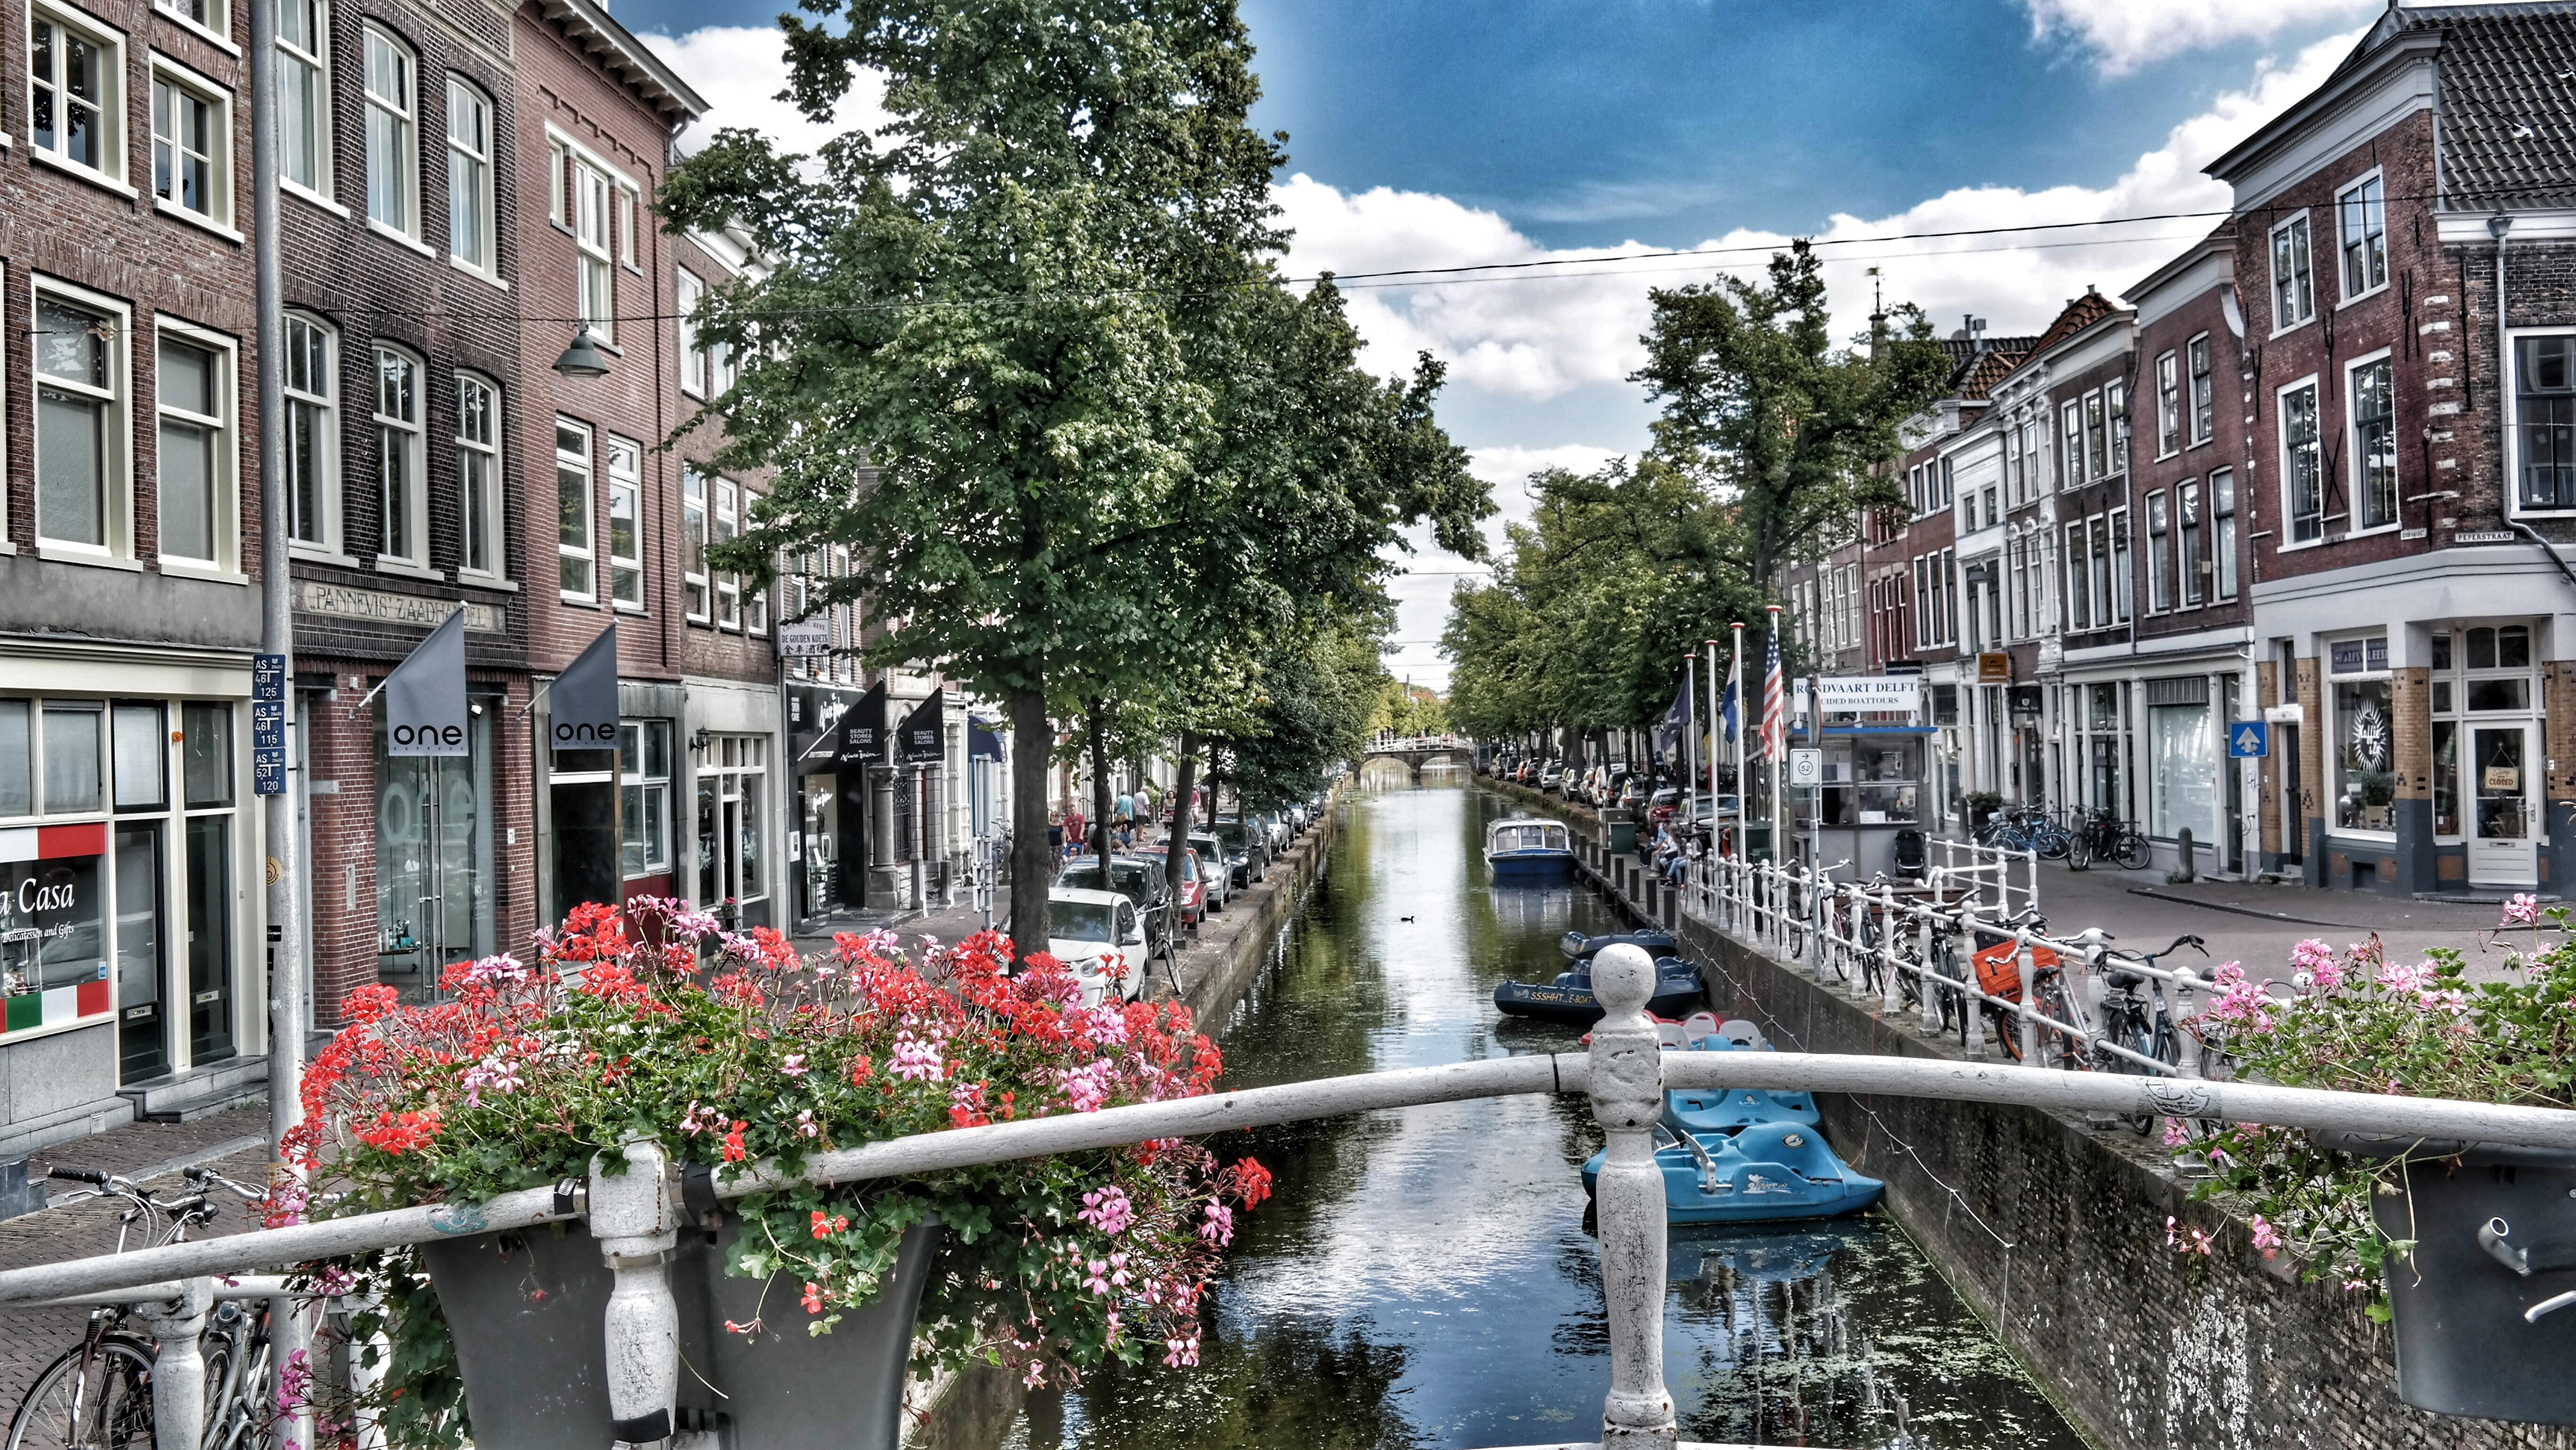

In [154]:
img = cv.imread('../images/image4.jpg')
disp(img)

In [152]:
# Capture image
cap = cv.VideoCapture(0)
if (cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        cv.imshow("NAME", frame)            
        cv.waitKey()
        cv.imwrite("img2.jpg",frame)
cap.release()
cv.destroyAllWindows()

In [153]:
# image Resize 
img = frame[100:400,130:330]

In [5]:
a = 20

In [6]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j,0]<200 and img[i,j,1]<230 and img[i,j,2]<200:
            img[i,j]+=a
        

In [7]:
show(img)


# Image Operartions 

## Image Enhancement in Spatial Domain

(600, 960, 3)

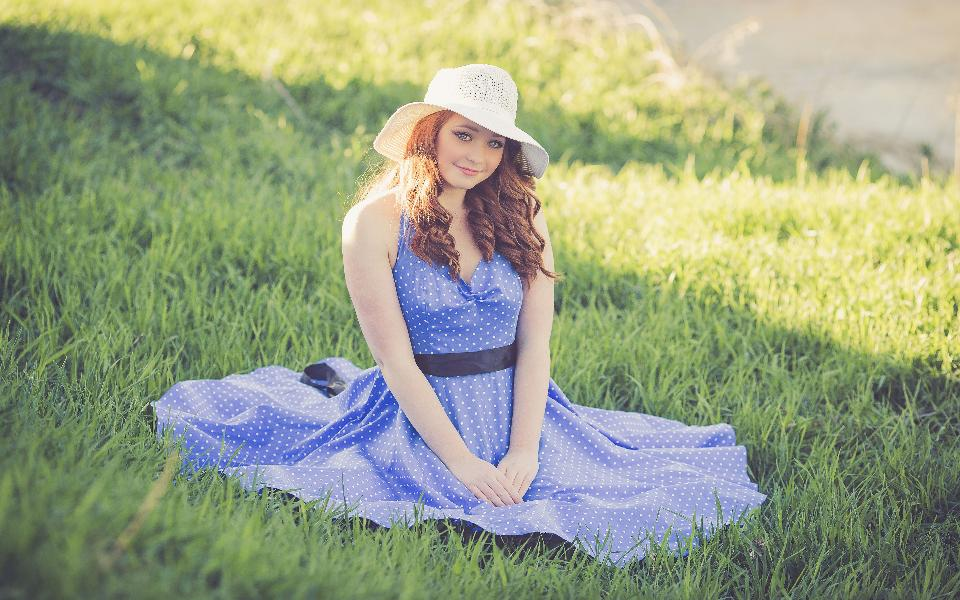

In [155]:
img =  cv.resize(cv.imread('../images/image2.jpg'),(960,600))
display(img.shape)
disp(img)

#### Contrast Straching 

$$\hat{I}(x,y)= \left( \frac{(I(x,y)-min_{i,j}I(i,j))(I_{MAX}-I_{MIN})}{max_{i,j}I(i,j)-min_{i,j}I(i,j)}\right)+I_{MIN}$$
$$\hat{I}(x,y)= \left( \frac{I(x,y)-min_{i,j}I(i,j)}{max_{i,j}I(i,j)-min_{i,j}I(i,j)}\right)\times 255$$

In [128]:
def stratch_contrast(img:np.ndarray)->np.ndarray :     
    if len(img.shape) == 3:
        b = img[:,:,0]
        g = img[:,:,1]
        r = img[:,:,2]
        nb = np.array(((b-b.min())/(b.max()-b.min()))*255, dtype=np.uint8)
        ng = np.array(((g-g.min())/(g.max()-g.min()))*255, dtype=np.uint8)
        nr = np.array(((r-r.min())/(r.max()-r.min()))*255, dtype=np.uint8)
        return np.dstack((nb,ng,nr)) 
    else :        
        return np.array(((img-img.min())/(img.max()-img.min()))*255, dtype=np.uint8)   

In [129]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
strached_img = stratch_contrast(img)
show(img_gray)
show(strached_img)

### Thresolding

## Geometrical Transformation

#### Scaling Image

In [5]:
img = cv.imread('../images/image5.jpg')
img.shape

(1200, 1920, 3)

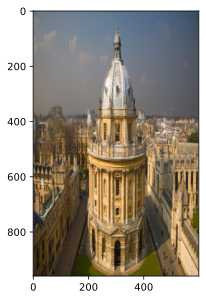

In [6]:
# Resizing Image
img = cv.resize(img,(600,960),interpolation=cv.INTER_CUBIC)

disp(img)

In [7]:
import re
for i in dir(cv):
    if re.match("INTER_.*", i):
        print("cv2."+i)

cv2.INTER_AREA
cv2.INTER_BITS
cv2.INTER_BITS2
cv2.INTER_CUBIC
cv2.INTER_LANCZOS4
cv2.INTER_LINEAR
cv2.INTER_LINEAR_EXACT
cv2.INTER_MAX
cv2.INTER_NEAREST
cv2.INTER_NEAREST_EXACT
cv2.INTER_TAB_SIZE
cv2.INTER_TAB_SIZE2


#### Translation 

Shifting of an object location 
Translation Matrix is 
$$ M = \begin{bmatrix} 
I_2 & T \end{bmatrix}
=\begin{bmatrix} 
1&0 & t_x\\
0&1& t_y
    \end{bmatrix}
$$

Translation operation is performed by ``` cv.wrapAffine```function

In [15]:
img

array([[[122, 113,  99],
        [120, 112,  99],
        [122, 113, 100],
        ...,
        [ 94,  70,  48],
        [ 95,  71,  49],
        [ 92,  68,  46]],

       [[123, 114, 101],
        [121, 113, 100],
        [123, 114, 101],
        ...,
        [ 94,  70,  48],
        [ 95,  71,  49],
        [ 92,  68,  46]],

       [[123, 114, 100],
        [122, 113,  99],
        [123, 114, 100],
        ...,
        [ 94,  70,  48],
        [ 95,  71,  49],
        [ 91,  67,  45]],

       ...,

       [[  1,   8,  25],
        [  4,  23,  39],
        [  5,  34,  48],
        ...,
        [141, 183, 218],
        [128, 175, 208],
        [118, 172, 203]],

       [[  2,   9,  26],
        [  5,  24,  39],
        [  3,  32,  46],
        ...,
        [140, 183, 217],
        [128, 177, 208],
        [115, 169, 200]],

       [[  2,  11,  27],
        [  6,  24,  39],
        [  3,  30,  45],
        ...,
        [140, 182, 217],
        [134, 182, 214],
        [115, 169, 200]]

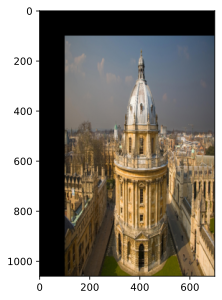

In [9]:

# img = cv.imread('img.jpg',cv.IMREAD_UNCHANGED)
rows,cols,_ = img.shape
M = np.matrix(
    '''1, 0, 100;
       0, 1, 100
    ''',dtype=np.float32)

translated_img = cv.warpAffine(img,M,(cols+100,rows+100))
disp(translated_img )

#### Rotatin 

Rotation of an image for an angle θ is achieved by the transformation matrix of the form
$$ R = \begin{bmatrix} 
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta\\
\end{bmatrix}
$$
```getRotationMatrix2D(center, angle, scale)``` function give the rotation matrix

In [10]:
center=np.array([img.shape[0],img.shape[1]])/2
R = cv.getRotationMatrix2D(center,40,1)

In [11]:
transformed_img = cv.warpAffine(img, R,(1000,1000))

In [12]:
show(transformed_img)

QApplication: invalid style override 'kvantum' passed, ignoring it.
	Available styles: Windows, Fusion


#### Affine Transform

```getAffineTransform(point_set_1,point_set_2)``` gives the matrix 

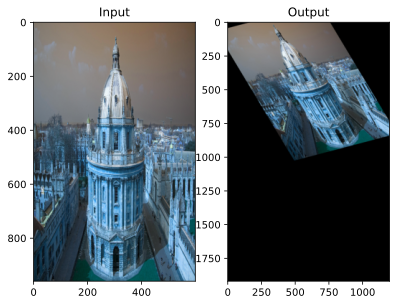

In [14]:
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols*2,rows*2))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

#### Perspective Transfoem

In [17]:
img.shape

(960, 600, 3)

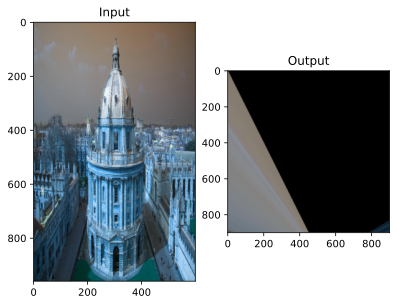

In [20]:
rows,cols,ch = img.shape
pts1 = np.float32([[40,40],[40,550],[40,900],[560,900]])
pts2 = np.float32([[0,0],[900,0],[0,600],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Image Filtering  

### Low Pass Filter 
* use to smoothing an image 
* 

### Convolution 2D filters 
* general filter : ```cv.filter2D(img, ddepth, kernel_matrix, anchore_point,border_type )```
* Box filter : ```cv.blur(img. filter_shape)```
* Gausian Filter : ```cv.GaussianBlur(img,filter_shape,sigma_X,sigma_Y=sigma_X)```
* Median Filter : ```cv.medianBlur(img, filter_shape)```
* Bilateral Filter : ```cv.bilateralFilter(img,9,75,75)```

In [132]:
# let define kernel 
v_edge_kernel = np.matrix('''-1, 0, 1;
                             -1, 0, 1;
                             -1, 0, 1''')
# transform image
transformed_img = cv.filter2D(src = img, ddepth = -1, kernel = v_edge_kernel)
show(transformed_img)


In [133]:
# let define kernel 
h_edge_kernel = np.matrix('''-1, -1, -1;
                              0,  0,  0;
                              1,  1,  1''')
# transform image
transformed_img = cv.filter2D(src = img, ddepth = -1, kernel = h_edge_kernel)
show(transformed_img)

In [42]:
transformed_img = cv.GaussianBlur(img, (5,5),1,2)
transformed_img= cv.bilateralFilter(img,9,50,75)